# Task description

Using the Titanic dataset to build a model that predicts whether a
passenger on the Titanic survived or not. 

# Import data

In [1]:
import pandas as pd
titanic=pd.read_csv("C:/Users/ZAHAR AMINA/Desktop/Codsoft/Task1/tested.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# Understanding

In [2]:
titanic.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [3]:
(titanic.isna().sum()/len(titanic))*100 

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.574163
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.239234
Cabin          78.229665
Embarked        0.000000
dtype: float64

In [4]:
titanic['Survived'].value_counts() #Classification problem

0    266
1    152
Name: Survived, dtype: int64

In [5]:
titanic['Pclass'].value_counts()

3    218
1    107
2     93
Name: Pclass, dtype: int64

In [6]:
titanic['SibSp'].value_counts()

0    283
1    110
2     14
3      4
4      4
8      2
5      1
Name: SibSp, dtype: int64

In [7]:
titanic['Parch'].value_counts()

0    324
1     52
2     33
3      3
4      2
9      2
6      1
5      1
Name: Parch, dtype: int64

In [8]:
titanic['Name'][titanic['Name'].duplicated()] #No duplicated value in Name feature !

Series([], Name: Name, dtype: object)

In [9]:
titanic['PassengerId'][titanic['PassengerId'].duplicated()] #No duplicated value in PassengerId feature 

Series([], Name: PassengerId, dtype: int64)

In [10]:
titanic['Ticket'][titanic['Ticket'].duplicated()] 

59               PC 17608
64               PC 17608
69                  19950
75                 113503
114              PC 17483
122                 13236
140               CA 2144
142              PC 17608
156              PC 17483
172                347072
174                347077
177                 11778
181              PC 17756
210                C 4001
213                 24065
218                113503
242                 16966
244            W./C. 6607
246          F.C.C. 13534
247                 28220
249                  2660
262                 29103
263                350405
270                 13050
272                 13508
281    SOTON/O.Q. 3101315
283                  2650
287                 21228
297                  2662
302           S.O./P.P. 2
306                113781
319            C.A. 31029
326                230136
330            C.A. 33112
338            C.A. 31029
342              CA. 2343
344              A/5. 851
352          S.O.C. 14879
353         

In [11]:
titanic['Ticket'].value_counts()

PC 17608    5
CA. 2343    4
113503      4
PC 17483    3
220845      3
           ..
349226      1
2621        1
4133        1
113780      1
2668        1
Name: Ticket, Length: 363, dtype: int64

# Insights :
    1.Name and PassengerId featues have no dupplicated values.
    -> Drop Name and PassengerId featues from selected DataSet.
    2.Cabin feature has 78% of NaN values.
    -> Drop Cabin feature from selected DataSet.
    3.Pclass feature has 3 classes.
    4.The Output "Servived" is a binary class (1 or 0).

# Data Cleaning 

In [12]:
titanic.drop(['Name', 'PassengerId', 'Cabin'], axis=1, inplace=True)

In [13]:
titanic['Fare'].fillna(titanic['Fare'].mean(), inplace=True)

In [14]:
(titanic.isna().sum()/len(titanic))*100 

Survived     0.000000
Pclass       0.000000
Sex          0.000000
Age         20.574163
SibSp        0.000000
Parch        0.000000
Ticket       0.000000
Fare         0.000000
Embarked     0.000000
dtype: float64

# Data Analysis and Preprocessing

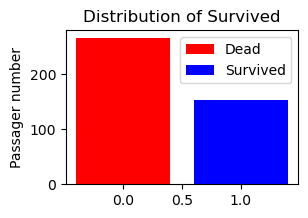

In [15]:
from matplotlib import pyplot as plt

classes_distribution = titanic['Survived'].value_counts()

# Plotting the histogram
plt.figure(figsize=(3,2))
plt.bar(classes_distribution.index, classes_distribution.values, color=['red', 'blue'], label=['Dead', 'Survived'])
plt.ylabel('Passager number')
plt.title('Distribution of Survived')
plt.legend()
plt.show()

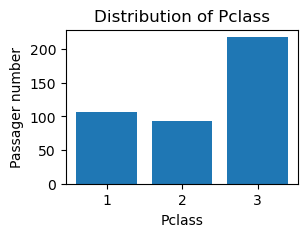

In [16]:
classes_distribution = titanic['Pclass'].value_counts()

# Plotting the histogram
plt.figure(figsize=(3, 2))
plt.bar(classes_distribution.index, classes_distribution.values)
plt.xlabel('Pclass')
plt.ylabel('Passager number')
plt.title('Distribution of Pclass')
plt.show()

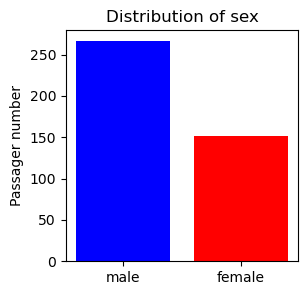

In [17]:
classes_distribution = titanic['Sex'].value_counts()

# Plotting the histogram
plt.figure(figsize=(3, 3))
plt.bar(classes_distribution.index, classes_distribution.values, color=['blue', 'red'])
plt.ylabel('Passager number')
plt.title('Distribution of sex')
plt.show()

In [18]:
titanic['Sex']=titanic['Sex'].apply(lambda x: 1 if x == 'female' else 0)
titanic['Embarked']=titanic['Embarked'].apply(lambda x: 1 if x == 'Q' else 0)

In [19]:
titanic.corr()

C:\Users\ZAHAR AMINA\AppData\Local\Temp\ipykernel_9760\2964377706.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  titanic.corr()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.108615,1.000000,-0.000013,0.099943,0.159120,0.191382,0.115574
Pclass,-0.108615,1.000000,-0.108615,-0.492143,0.001087,0.018721,-0.576619,0.252608
Sex,1.000000,-0.108615,1.000000,-0.000013,0.099943,0.159120,0.191382,0.115574
Age,-0.000013,-0.492143,-0.000013,1.000000,-0.091587,-0.061249,0.335029,-0.017956
SibSp,0.099943,0.001087,0.099943,-0.091587,1.000000,0.306895,0.171488,-0.098824
Parch,0.159120,0.018721,0.159120,-0.061249,0.306895,1.000000,0.230001,-0.132948
Fare,0.191382,-0.576619,0.191382,0.335029,0.171488,0.230001,1.000000,-0.155539
Embarked,0.115574,0.252608,0.115574,-0.017956,-0.098824,-0.132948,-0.155539,1.000000


In [20]:
import numpy as np
titanic['Age'].fillna(np.floor(titanic['Age'].mean()), inplace=True)

In [21]:
titanic['Age']=(titanic['Age']-titanic['Age'].mean())/titanic['Age'].std()

In [22]:
titanic['Fare']=(titanic['Fare']-titanic['Fare'].mean())/titanic['Fare'].std()

In [23]:
(titanic.isna().sum()/len(titanic))*100 

Survived    0.0
Pclass      0.0
Sex         0.0
Age         0.0
SibSp       0.0
Parch       0.0
Ticket      0.0
Fare        0.0
Embarked    0.0
dtype: float64

In [34]:
#Split DataSet
from sklearn.model_selection import StratifiedShuffleSplit
x=titanic.drop(['Survived', 'Ticket'], axis=1)
y=titanic['Survived']
bins = pd.cut(y, bins=2, labels=False)
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in splitter.split(x, bins):
    X_train, X_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]


# Train model

# K-Nearest Neighboors

In [47]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train, y_train)
predknn=neigh.predict(X_test)
accuracy_score(predknn, y_test)

0.9523809523809523